# Temperature Forecast Project using ML

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import files
uploaded=files.upload()

Saving temperature_prediction.csv to temperature_prediction.csv


In [7]:
#Import Train Data
df=pd.read_csv("temperature_prediction.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Problem Definition

# Data Analysis

In [9]:
#Check the rows & columns id dataset
df.shape

(7752, 25)

In [10]:
#Check the data type of features 
df.info()
#All the independent variables are numeric in nature, except date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [11]:
#Check the null values
df.isnull().sum()
#There are null values in most of the independent variables.

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [12]:
#Check all the features
#1. station
df.station

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
7747    23.0
7748    24.0
7749    25.0
7750     NaN
7751     NaN
Name: station, Length: 7752, dtype: float64

In [13]:
#As Nan values are at index=7750,7751, drop bith the rows
df=df.drop(index=[7750,7751])

In [14]:
#CHeck null values in station
df.station.isnull().sum()

0

In [15]:
#2. Date
df.Date.value_counts()

10-08-2016    25
04-08-2014    25
08-07-2015    25
19-08-2015    25
17-07-2014    25
              ..
23-07-2015    25
25-07-2015    25
24-08-2013    25
03-07-2014    25
27-07-2015    25
Name: Date, Length: 310, dtype: int64

In [16]:
# Split the date into day-month & year
df["Day"],df["Month"],df["Year"]=df["Date"].str.split("-",3).str
#Drop the "Date" column
df.drop(columns=["Date"],inplace=True)

In [17]:
df.isnull().sum()

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  0
Month                0
Year                 0
dtype: int64

In [18]:
col=df.columns[1:17]
col

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'],
      dtype='object')

In [19]:
#Replace the NaN values in the column by mean.
for i in col:
    df[i]= df[i].replace(np.nan,df[i].mean())   

In [20]:
#Drop all the null values from target variables
df.dropna(axis=0,inplace=True)

In [21]:
#Check the null values in dataset
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

In [22]:
#Final shape of the dataset
df.shape

(7723, 27)

In [23]:
#Check the pearson correlation 
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113069,0.132188,-0.068285,-0.168195,0.070062,0.104919,0.004444,-0.132215,0.005876,0.002184,-0.000413,0.005160,-0.003539,-0.009600,-0.014191,-0.011564,-0.238460,-0.118755,-0.257215,-0.091449,-0.020255,0.108306,0.128719
Present_Tmax,0.113069,1.000000,0.617749,-0.206945,-0.304551,0.568926,0.623177,-0.124899,0.133116,-0.313529,-0.215106,-0.144973,-0.141379,-0.113867,-0.103755,-0.126282,-0.105283,-0.054255,0.007439,-0.188650,-0.106727,-0.026798,0.609839,0.622235
Present_Tmin,0.132188,0.617749,1.000000,0.120546,-0.018335,0.462184,0.762388,-0.038299,-0.012660,0.083297,0.088955,-0.004617,-0.045934,0.110141,0.065328,-0.051824,-0.068798,-0.080914,-0.045411,-0.252359,-0.147869,0.051451,0.470231,0.796415
LDAPS_RHmin,-0.068285,-0.206945,0.120546,1.000000,0.578708,-0.568968,0.086273,0.291812,-0.072808,0.613201,0.744980,0.688652,0.512801,0.260374,0.390614,0.237664,0.165221,0.085414,-0.077668,0.101430,0.122570,0.242471,-0.442560,0.092980
LDAPS_RHmax,-0.168195,-0.304551,-0.018335,0.578708,1.000000,-0.377209,-0.117417,0.132796,0.237706,0.436276,0.391003,0.225859,0.129282,0.268282,0.228162,0.132484,0.115835,0.194563,0.024993,0.176848,0.218913,0.147962,-0.287545,-0.075357
LDAPS_Tmax_lapse,0.070062,0.568926,0.462184,-0.568968,-0.377209,1.000000,0.653320,-0.316285,0.044499,-0.440665,-0.526132,-0.543809,-0.431253,-0.116574,-0.249063,-0.194624,-0.166970,-0.044057,0.090174,-0.180786,-0.163377,0.046252,0.828256,0.586563
LDAPS_Tmin_lapse,0.104919,0.623177,0.762388,0.086273,-0.117417,0.653320,1.000000,-0.133353,-0.138403,0.008993,0.045908,-0.045772,-0.081777,0.034450,-0.002782,-0.093480,-0.099826,-0.098540,-0.026887,-0.196883,-0.186902,0.157897,0.586750,0.881345
LDAPS_WS,0.004444,-0.124899,-0.038299,0.291812,0.132796,-0.316285,-0.133353,1.000000,0.003230,0.287090,0.258623,0.239415,0.218480,0.143133,0.183197,0.148422,0.132244,0.033959,-0.063031,0.189009,0.168964,0.121238,-0.348700,-0.100936
LDAPS_LH,-0.132215,0.133116,-0.012660,-0.072808,0.237706,0.044499,-0.138403,0.003230,1.000000,-0.148572,-0.265604,-0.247322,-0.173811,-0.019108,-0.084894,0.009076,0.012848,0.131417,0.024023,0.054989,0.086688,-0.047346,0.155627,-0.058746
LDAPS_CC1,0.005876,-0.313529,0.083297,0.613201,0.436276,-0.440665,0.008993,0.287090,-0.148572,1.000000,0.779291,0.516487,0.360310,0.447020,0.389797,0.167147,0.089078,-0.009449,-0.008468,-0.014951,-0.021798,0.217719,-0.456074,-0.012759


# EDA

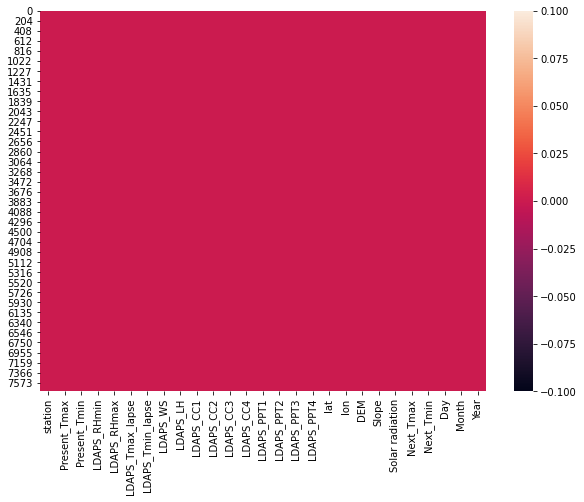

In [24]:
#Check both the target variables
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())

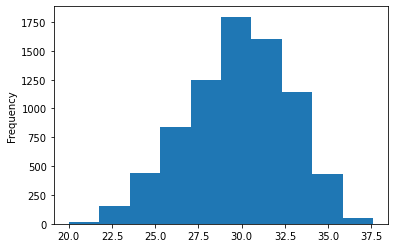

In [25]:
# "Present_Tmax"
df["Present_Tmax"].plot.hist()
#Data is slightly left skewed

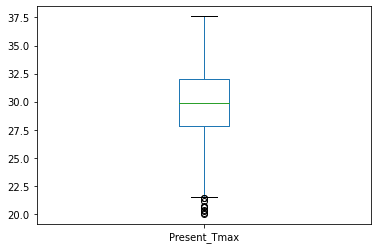

In [26]:
df.Present_Tmax.plot.box()
#Outliers present in data

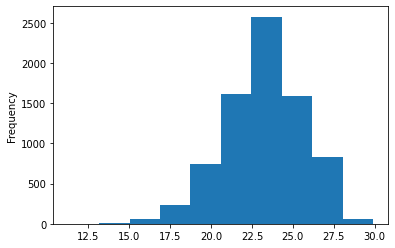

In [27]:
#"Present_Tmin"
df.Present_Tmin.plot.hist()
#Data is left skewed

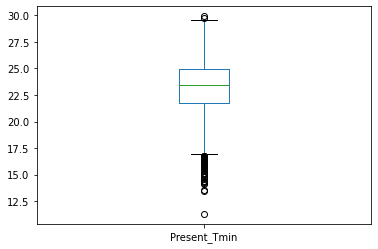

In [28]:
df.Present_Tmin.plot.box()
#Outliers present in data

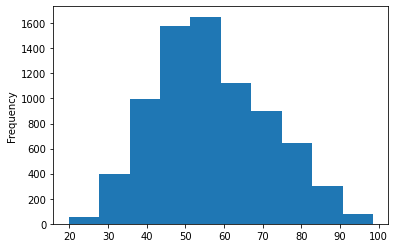

In [29]:
#"LDAPS_RHmin"
df.LDAPS_RHmin.plot.hist()
#Data is not skewed

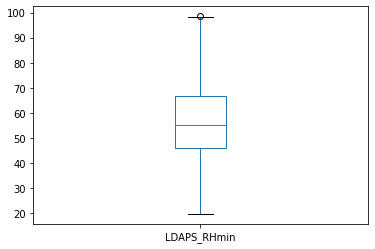

In [30]:
df.LDAPS_RHmin.plot.box()
#No outliers present in data

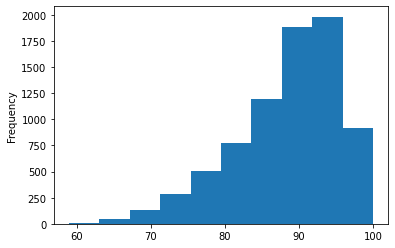

In [31]:
# "LDAPS_RHmax"
df.LDAPS_RHmax.plot.hist()
#Data is left skewed

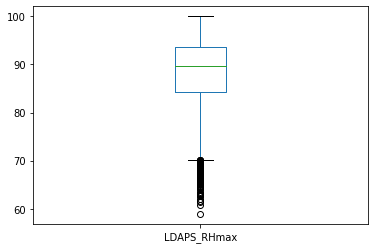

In [32]:
df.LDAPS_RHmax.plot.box()
#Outliers present in data

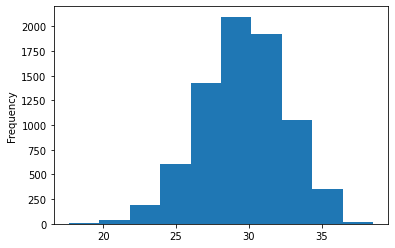

In [33]:
# "LDAPS_Tmax_lapse"
df.LDAPS_Tmax_lapse.plot.hist()
#Data is partially left skewed

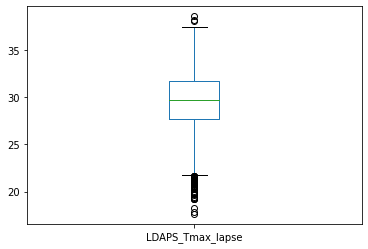

In [34]:
df.LDAPS_Tmax_lapse.plot.box()
#Outliers present in data

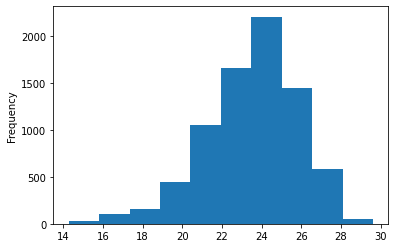

In [35]:
#"LDAPS_Tmin_lapse"
df.LDAPS_Tmin_lapse.plot.hist()
#Data is partially left skewed

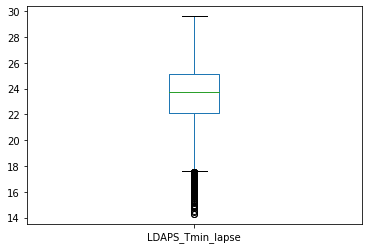

In [36]:
df.LDAPS_Tmin_lapse.plot.box()
#Outliers present in data

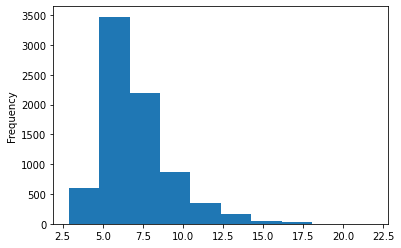

In [37]:
#"LDAPS_WS"
df.LDAPS_WS.plot.hist()
#Data is right skewed

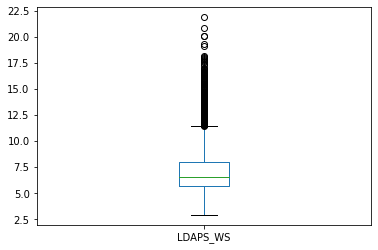

In [38]:
df.LDAPS_WS.plot.box()
#Outliers present in data

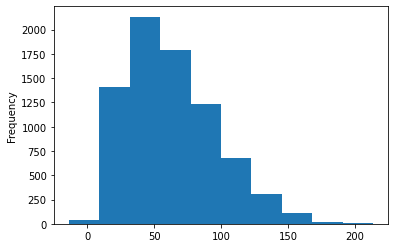

In [39]:
#"LDAPS_LH"
df.LDAPS_LH.plot.hist()
#Data is right skewed

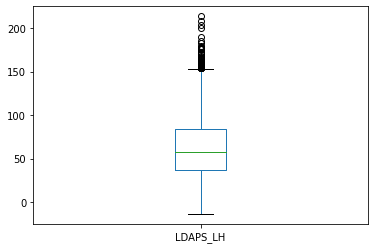

In [40]:
df.LDAPS_LH.plot.box()
#Outliers present in data

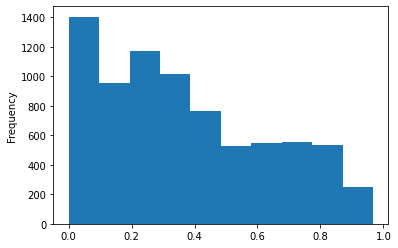

In [41]:
#"LDAPS_CC1"
df.LDAPS_CC1.plot.hist()
#Data is right skewed

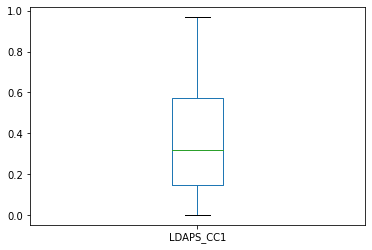

In [42]:
df.LDAPS_CC1.plot.box()
#No outliers present in data

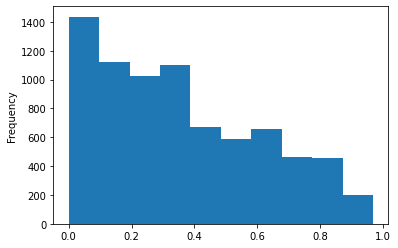

In [43]:
#"LDAPS_CC2"
df.LDAPS_CC2.plot.hist()
#Data is right skewed

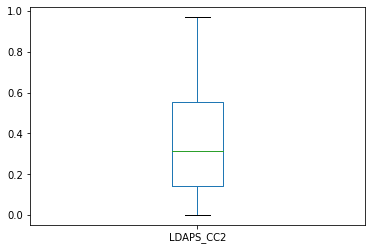

In [44]:
df.LDAPS_CC2.plot.box()
#No outliers present in data

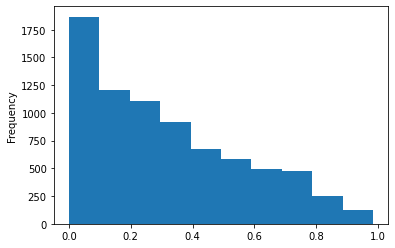

In [45]:
# "LDAPS_CC3"
df.LDAPS_CC3.plot.hist()
#Data is right skewed

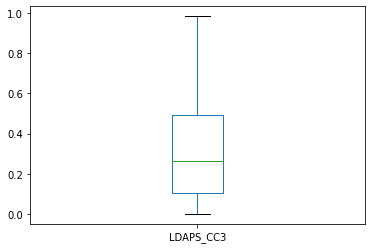

In [46]:
df.LDAPS_CC3.plot.box()
#No outliers present in data

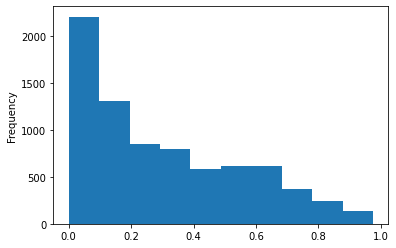

In [47]:
# "LDAPS_CC4"
df.LDAPS_CC4.plot.hist()
#Data is right skewed

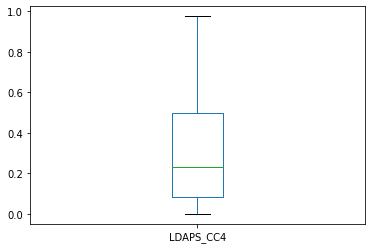

In [48]:
df.LDAPS_CC4.plot.box()
#No outliers present in data

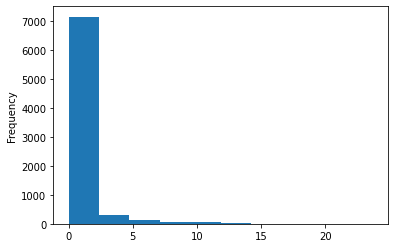

In [49]:
#"LDAPS_PPT1"
df.LDAPS_PPT1.plot.hist()
#Data is right skewed

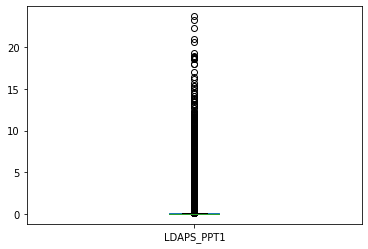

In [50]:
df.LDAPS_PPT1.plot.box()
#Outliers present in dataset

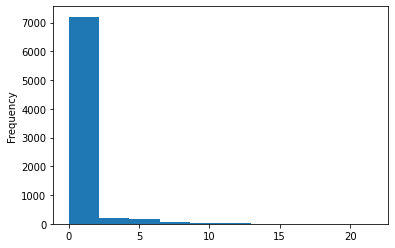

In [51]:
#"LDAPS_PPT2"
df.LDAPS_PPT2.plot.hist()
#Data is right skewed

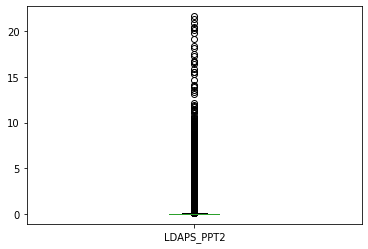

In [52]:
df.LDAPS_PPT2.plot.box()
#Outliers present in dataset

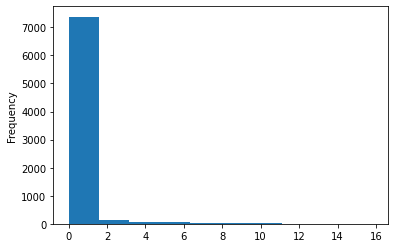

In [53]:
#"LDAPS_PPT3"
df.LDAPS_PPT3.plot.hist()
#Data is right skewed

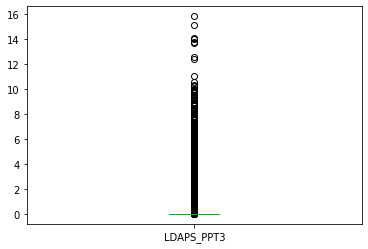

In [54]:
df.LDAPS_PPT3.plot.box()
#Many outliers present in data

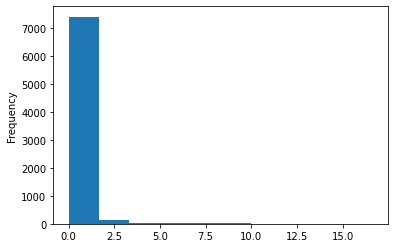

In [55]:
#"LDAPS_PPT4"
df.LDAPS_PPT4.plot.hist()
#Data is right skewed

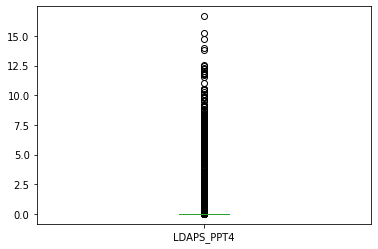

In [56]:
df.LDAPS_PPT4.plot.box()
#Outliers present in data

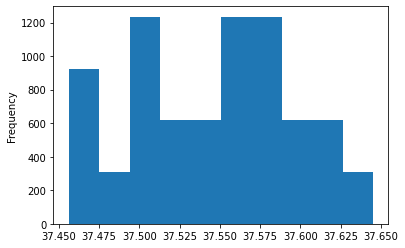

In [57]:
#"lat"
df.lat.plot.hist()
#Data is bi-modal

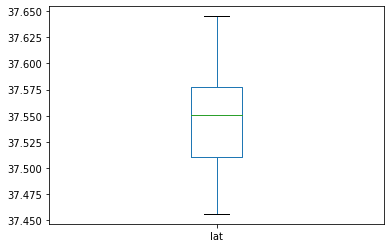

In [58]:
df.lat.plot.box()
#No outliers in the dataset

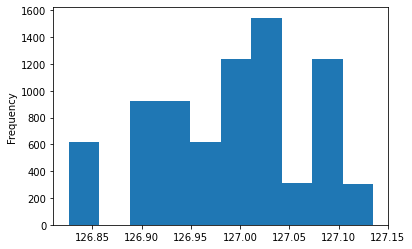

In [59]:
#"lon"
df.lon.plot.hist()
#Data is uniformly distrubted

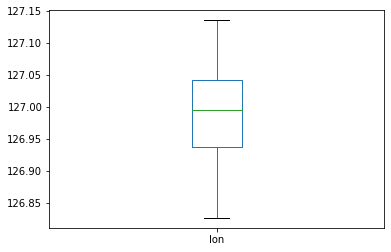

In [60]:
df.lon.plot.box()
#NO outliers found

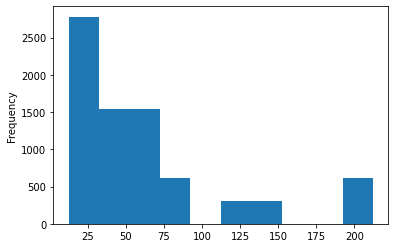

In [61]:
#"DEM"
df.DEM.plot.hist()
#Data is right skewed

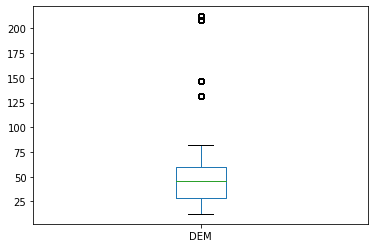

In [62]:
df.DEM.plot.box()
# There are outliers in the dataset

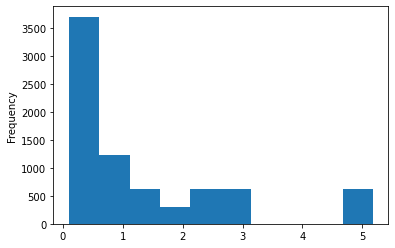

In [63]:
#"Slope"
df.Slope.plot.hist()
#Data is right skewed

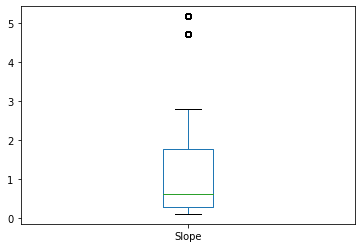

In [64]:
df.Slope.plot.box()

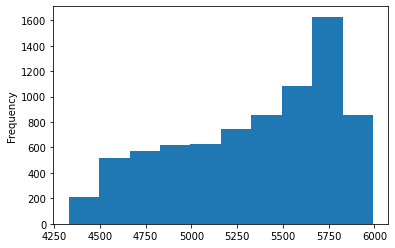

In [65]:
#"Solar radiation"
df["Solar radiation"].plot.hist()
#Data is left skewed

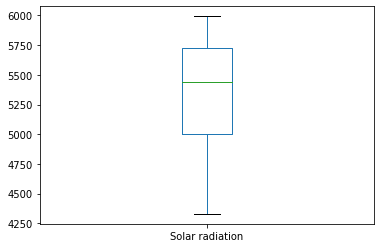

In [66]:
df["Solar radiation"].plot.box()
#No outliers present

<Figure size 1584x504 with 0 Axes>

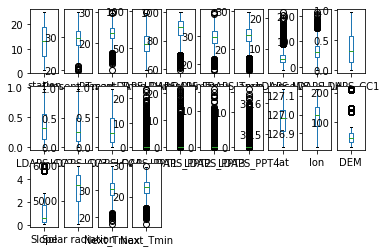

In [67]:
#Box plot 
plt.figure(figsize=(22,7))
df.plot(kind='box',subplots=True,layout=(3,10))
plt.show()

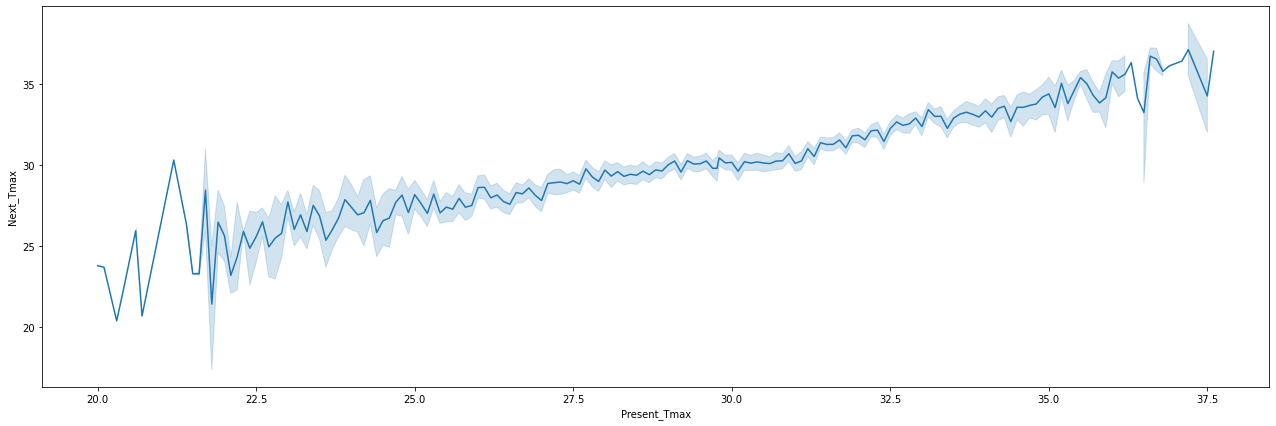

In [68]:
#Bi-Variate Analysis
plt.figure(figsize=(22,7))
sns.lineplot(x="Present_Tmax",y="Next_Tmax",data=df)
#Independent variable "Present_Tmax" is stongly correlated with "Next_Tmax"

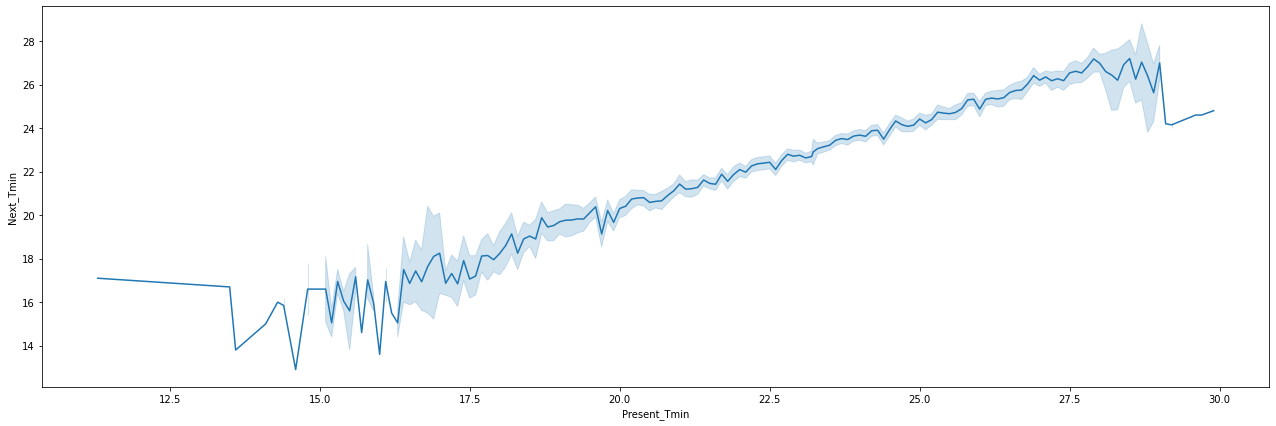

In [69]:
plt.figure(figsize=(22,7))
sns.lineplot(x="Present_Tmin",y="Next_Tmin",data=df)
#Independent feature "Present_Tmin" is strongly correlated to dependent variable "Next_Tmin"

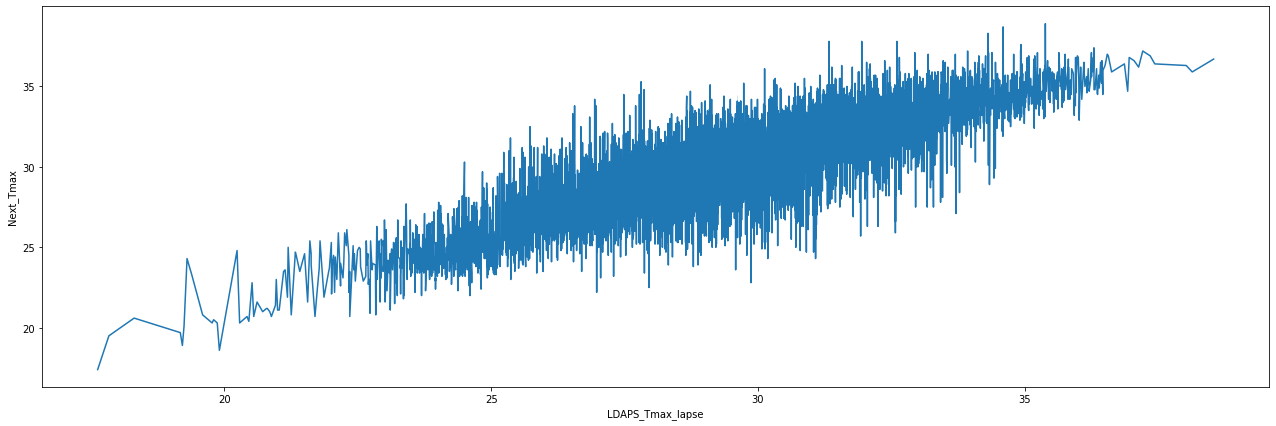

In [70]:
plt.figure(figsize=(22,7))
sns.lineplot(x="LDAPS_Tmax_lapse",y="Next_Tmax",data=df)
#Independent feature "LDAPS_Tmax_lapse" is strongly correlated to dependent variable "Next_Tmax"

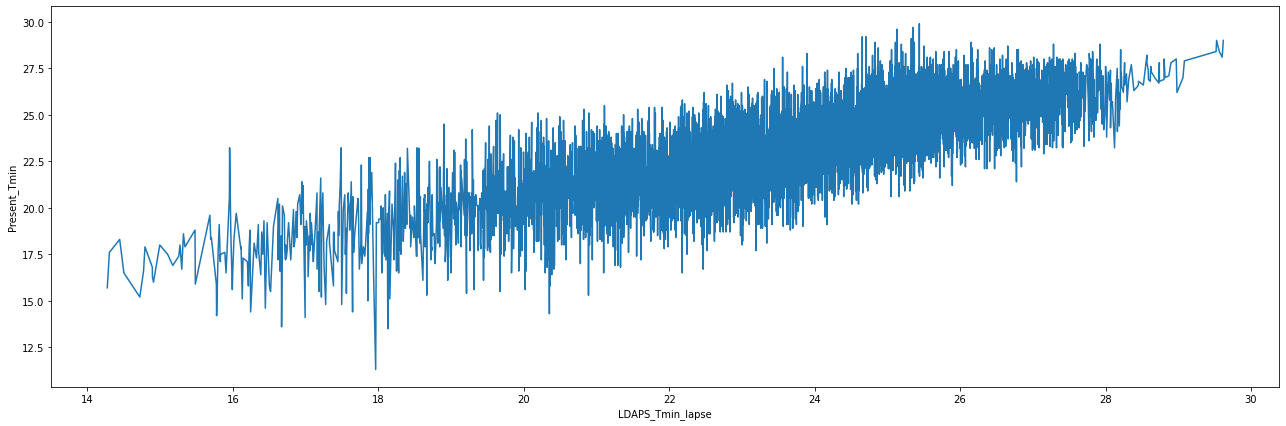

In [71]:
plt.figure(figsize=(22,7))
sns.lineplot(x="LDAPS_Tmin_lapse",y="Present_Tmin",data=df)
#Independent feature "Present_Tmin" is strongly correlated to dependent variable "Next_Tmin"

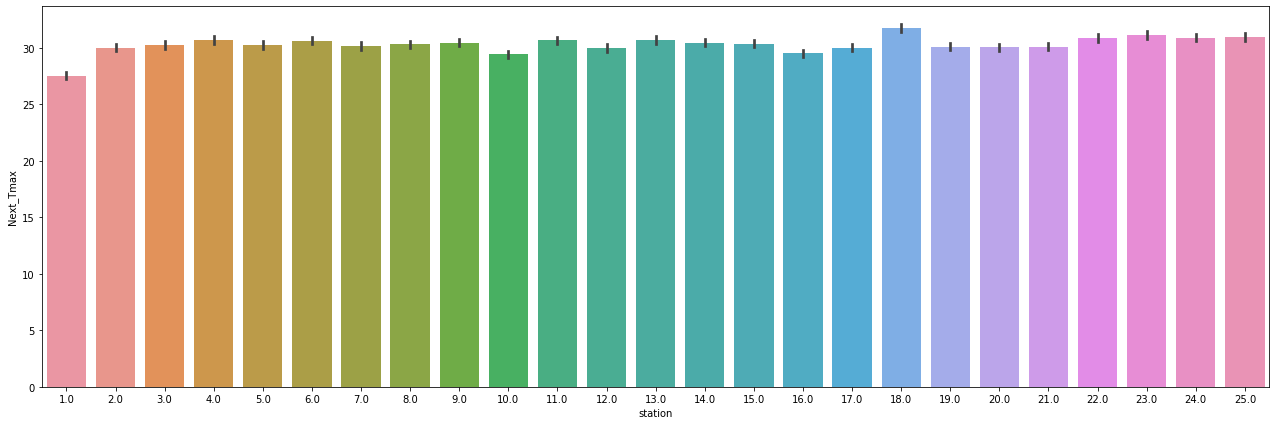

In [72]:
#Data distribution "station" vs Next_Tmax
plt.figure(figsize=(22,7))
sns.barplot(x="station",y="Next_Tmax",data=df)

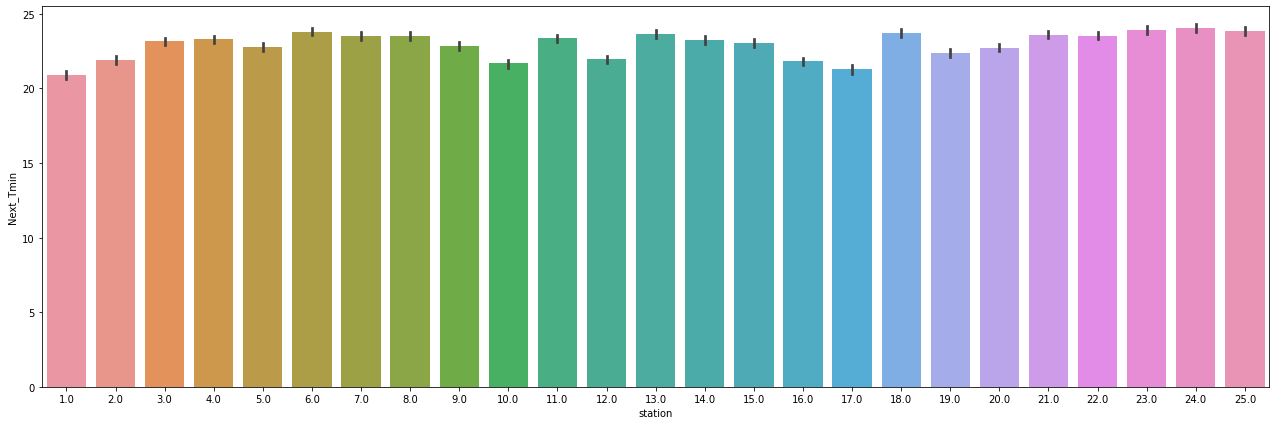

In [73]:
plt.figure(figsize=(22,7))
sns.barplot(x="station",y="Next_Tmin",data=df)

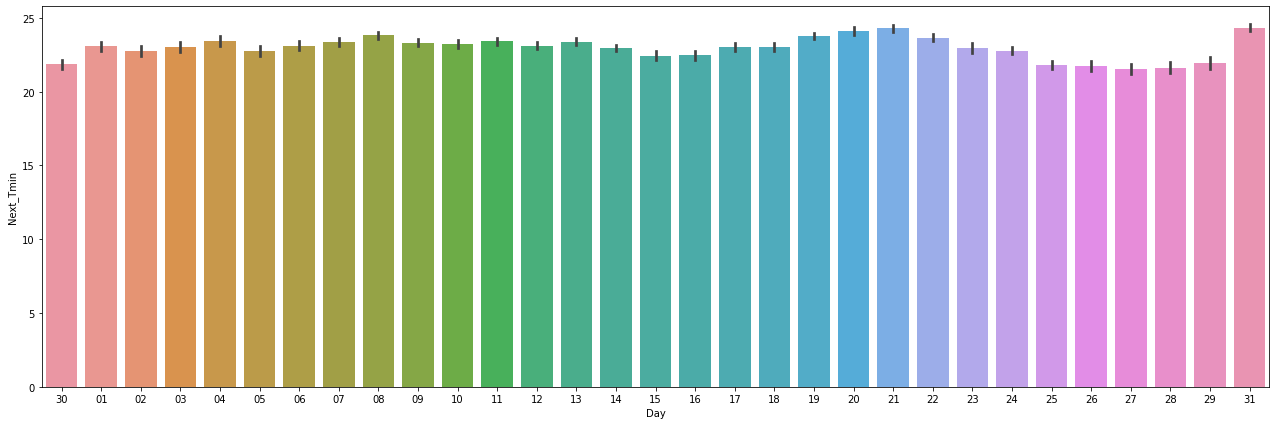

In [74]:
plt.figure(figsize=(22,7))
sns.barplot(x="Day",y="Next_Tmin",data=df)

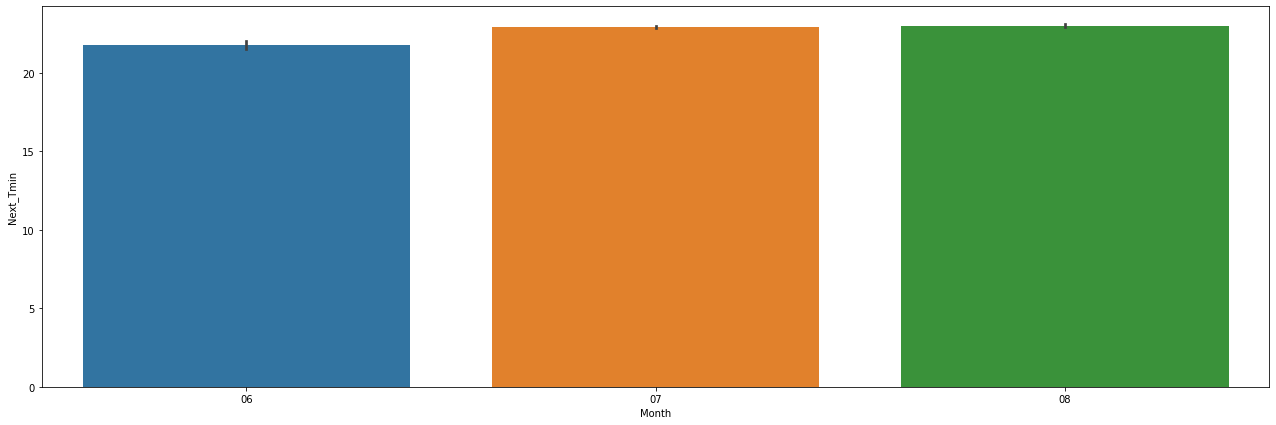

In [75]:
plt.figure(figsize=(22,7))
sns.barplot(x="Month",y="Next_Tmin",data=df)

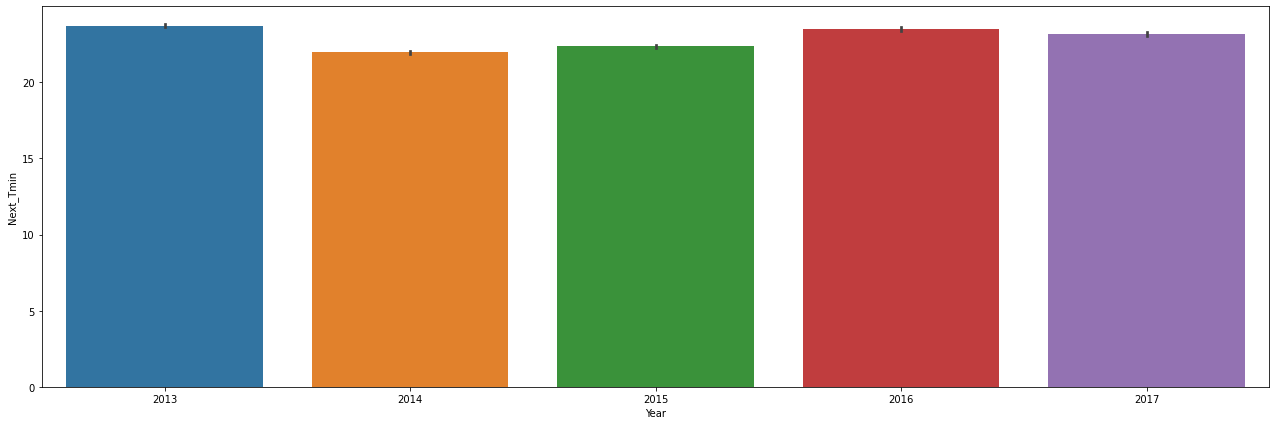

In [76]:
plt.figure(figsize=(22,7))
sns.barplot(x="Year",y="Next_Tmin",data=df)
# 2014 & 2015 were relatively coldest compared to 2013,2016 & 2017

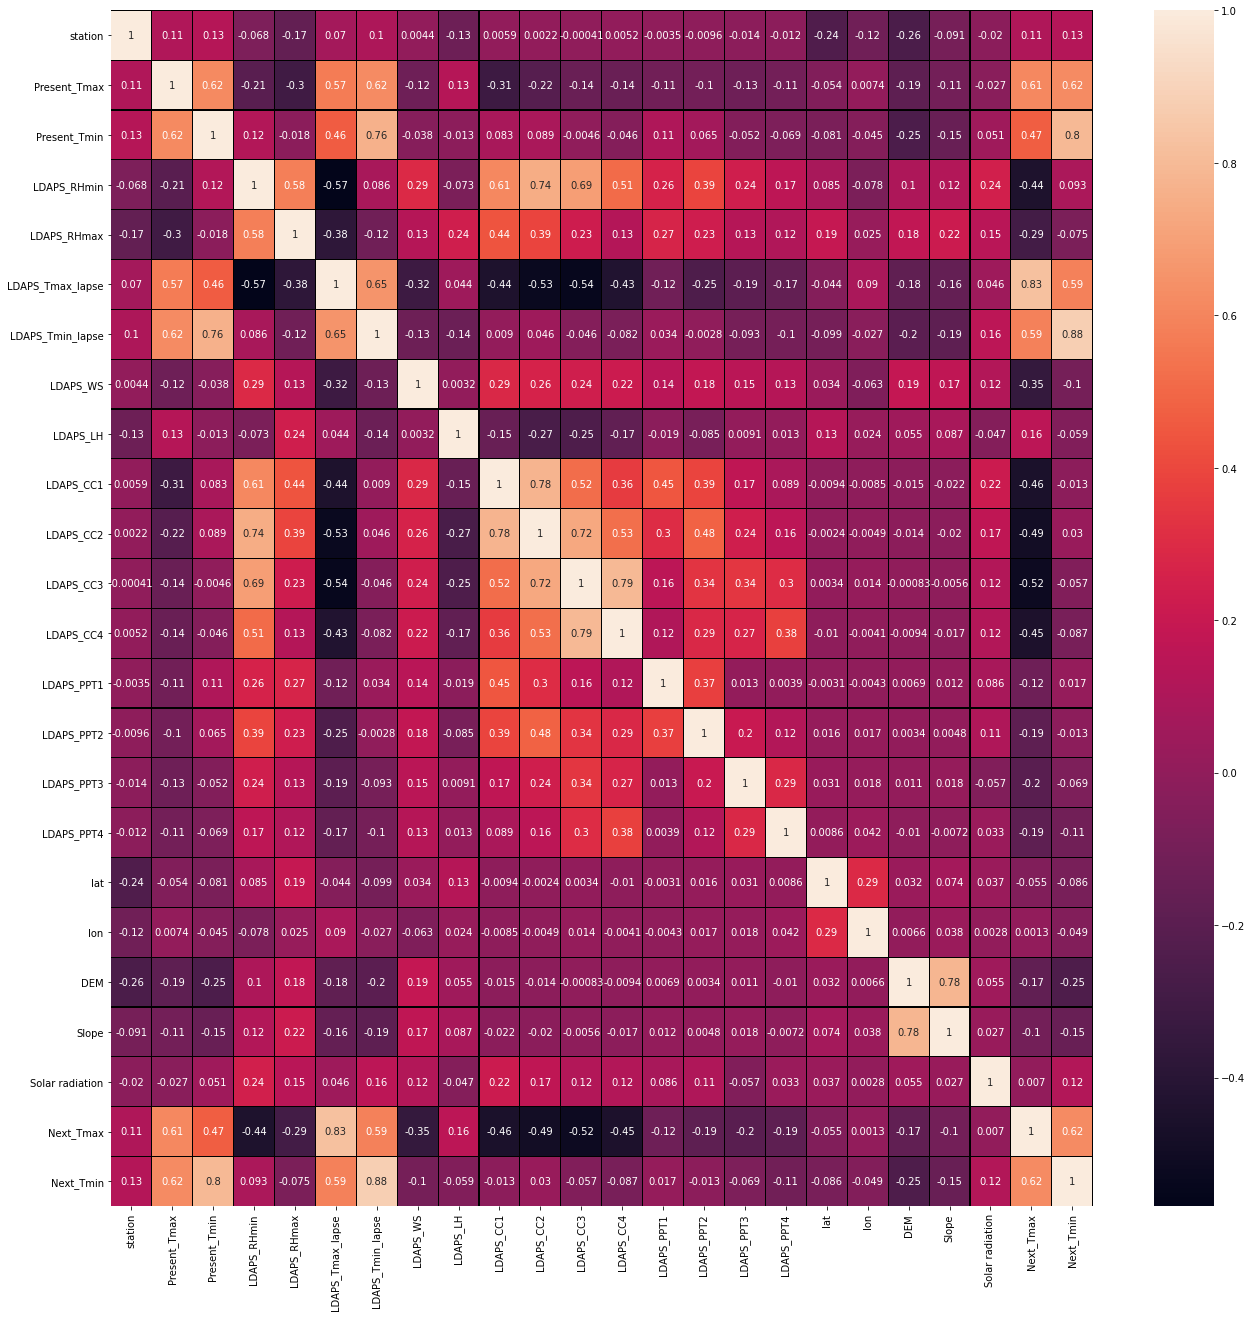

In [77]:
#Multi variate analysis
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="Black")
plt.show()

# Pre-processing Pipeline

In [78]:
#Data Types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7723 non-null   float64
 1   Present_Tmax      7723 non-null   float64
 2   Present_Tmin      7723 non-null   float64
 3   LDAPS_RHmin       7723 non-null   float64
 4   LDAPS_RHmax       7723 non-null   float64
 5   LDAPS_Tmax_lapse  7723 non-null   float64
 6   LDAPS_Tmin_lapse  7723 non-null   float64
 7   LDAPS_WS          7723 non-null   float64
 8   LDAPS_LH          7723 non-null   float64
 9   LDAPS_CC1         7723 non-null   float64
 10  LDAPS_CC2         7723 non-null   float64
 11  LDAPS_CC3         7723 non-null   float64
 12  LDAPS_CC4         7723 non-null   float64
 13  LDAPS_PPT1        7723 non-null   float64
 14  LDAPS_PPT2        7723 non-null   float64
 15  LDAPS_PPT3        7723 non-null   float64
 16  LDAPS_PPT4        7723 non-null   float64


In [79]:
#Removing the features that logically do not contribute to the model ir Features like Station Date,Day,Month
dfn=df.drop(columns=["station","Day","Month","Year"])
dfn.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [80]:
#Shape of new datset
dfn.shape

(7723, 23)

In [81]:
#Check the skewness before outliers
dfn.skew()

Present_Tmax       -0.263627
Present_Tmin       -0.356551
LDAPS_RHmin         0.302971
LDAPS_RHmax        -0.849771
LDAPS_Tmax_lapse   -0.223713
LDAPS_Tmin_lapse   -0.577911
LDAPS_WS            1.558546
LDAPS_LH            0.666811
LDAPS_CC1           0.460287
LDAPS_CC2           0.474833
LDAPS_CC3           0.641574
LDAPS_CC4           0.665627
LDAPS_PPT1          5.329750
LDAPS_PPT2          5.720524
LDAPS_PPT3          6.379482
LDAPS_PPT4          6.751502
lat                 0.086467
lon                -0.286647
DEM                 1.721745
Slope               1.560876
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
dtype: float64

In [82]:
##lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(dfn))
print("Before outliers\n",dfn.shape)
df_final=dfn.loc[(z_score<3).all(axis=1)]
print("After removing outliers\n",df_final.shape)

Before outliers
 (7723, 23)
After removing outliers
 (6862, 23)


In [83]:
print("Pecentage data retained:",(6862/7723)*100,"%")

Pecentage data retained: 88.8514825844879 %


In [84]:
#Skewness after removing outliers
df_final.skew()

Present_Tmax       -0.274337
Present_Tmin       -0.224299
LDAPS_RHmin         0.306967
LDAPS_RHmax        -0.686551
LDAPS_Tmax_lapse   -0.108168
LDAPS_Tmin_lapse   -0.380000
LDAPS_WS            1.089327
LDAPS_LH            0.567820
LDAPS_CC1           0.597068
LDAPS_CC2           0.504596
LDAPS_CC3           0.701806
LDAPS_CC4           0.710968
LDAPS_PPT1          3.724953
LDAPS_PPT2          4.858078
LDAPS_PPT3          5.511174
LDAPS_PPT4          5.915485
lat                 0.106931
lon                -0.276466
DEM                 1.761917
Slope               1.591973
Solar radiation    -0.507643
Next_Tmax          -0.269169
Next_Tmin          -0.238413
dtype: float64

In [85]:
#CHeck the dataset
df_final.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [86]:
#Split test & train data
df_x=df_final.drop(columns=["Next_Tmax","Next_Tmin"])
df_ymax=df_final["Next_Tmax"]
df_ymin=df_final["Next_Tmin"]
print(df_x.shape,df_ymax.shape,df_ymin.shape)

(6862, 21) (6862,) (6862,)


In [87]:
#Data scaling to achieve more accuracy
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-0.434046,-0.827087,0.194485,0.437767,-0.664355,-0.290631,-0.023401,0.226790,-0.443292,-0.531519,-0.573970,-0.619892,-0.346247,-0.283515,-0.264984,-0.243823,1.213591,0.002988,2.826007,1.145136,1.550335
1,0.686149,-0.740486,-0.239970,0.363791,-0.014273,0.173475,-0.637184,-0.300418,-0.477032,-0.331370,-0.583779,-0.633547,-0.346247,-0.283515,-0.264984,-0.243823,1.213591,0.518139,-0.305129,-0.536151,1.256227
2,0.581131,-0.004372,-0.499015,-0.594981,0.073767,0.413016,-0.394102,-1.244532,-0.541657,-0.307549,-0.389374,-0.572125,-0.346247,-0.283515,-0.264984,-0.243823,0.673098,0.844820,-0.519180,-0.719760,1.242527
3,0.721155,0.038928,0.193332,1.213809,-0.067719,-0.146515,-0.659970,0.114672,-0.513558,-0.439099,-0.576318,-0.605727,-0.346247,-0.283515,-0.264984,-0.243823,2.022327,0.392492,-0.287311,0.959897,1.226842
4,0.511119,-0.610583,0.043565,0.298786,-0.283864,-0.074149,-0.613703,1.386109,-0.773286,-0.338795,-0.499096,-0.453123,-0.346247,-0.283515,-0.264984,-0.243823,0.134608,1.812298,-0.486832,-0.542518,1.232999


# Model Training & Fitting

In [88]:
#Check best random state: Considering r2 metrics
#User-defined function to find r2 score:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [89]:
#User defined function for cross-validation
from sklearn.model_selection import cross_val_score
def cross_val(model,x,y):
    cv=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",cv.mean())
    print(cv)

# Predict target variable "Next_Tmax "

# 1. Decision Tree Regressor

In [90]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dt_r2=maxr2_score(dtr,x,df_ymax)

max r2 score corresponding to  70  is  0.7737114274132778


In [91]:
#Cross validation (Decision tree)
cross_val(dtr,x,df_ymax)

Mean r2 score for regressor:  0.43501085137452106
[0.39770757 0.3797919  0.44538168 0.4994287  0.45274442]


# 2. K-Nearest Neighbor

In [92]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
r_state=maxr2_score(knr,x,df_ymax)

max r2 score corresponding to  91  is  0.8694715110647755


In [93]:
#Cross validation (KNN Classifier)
cross_val(knr,x,df_ymax)

Mean r2 score for regressor:  0.5344817329944059
[0.58838048 0.43163882 0.52109831 0.56234963 0.56894143]


# 3  Support Vector Regressor

In [94]:
from sklearn.svm import SVR
svr=SVR()
svr_r2=maxr2_score(svr,x,df_ymax)

max r2 score corresponding to  74  is  0.8656163984113381


In [95]:
#Cross validation (SVR)
cross_val(svr,x,df_ymax)

Mean r2 score for regressor:  0.6415705519191215
[0.63079334 0.57612313 0.67006265 0.67144515 0.65942848]


# 4. Random Forest Regressor

In [96]:
#Check maxr2_score function
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr_r2=maxr2_score(rfr,x,df_ymax)

max r2 score corresponding to  74  is  0.9014607468758576


In [97]:
#Cross validation (Random Forest)
cross_val(rfr,x,df_ymax)

Mean r2 score for regressor:  0.665812147651362
[0.72000807 0.64621932 0.6562188  0.69198468 0.61462986]


In [98]:
#Random forest regressor is the best performing model.
#Hyper Parameter tuning (random forest regressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
rgr = GridSearchCV(rfr, parameters, cv=5)
rgr.fit(x,df_ymax)
rgr.best_params_

{'n_estimators': 500}

In [106]:
#Random Forest with hyper parameters
# Random state= 74
# Parameter={'n_estimators': 500}

x_train,x_test,y_train,y_test=train_test_split(x,df_ymax,test_size=0.2,random_state=74)
rfr=RandomForestRegressor(n_estimators=500)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("R2 score=",r2_score(y_test,y_pred))
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean abs error=",mean_absolute_error(y_test,y_pred))

R2 score= 0.9030184907755747
RMSE= 0.9266538389218686
Mean abs error= 0.7000391842680262


In [112]:
#Saving the best model
import joblib
joblib.dump(rfr,'Next_Tmax.joblib')

['Next_Tmax.joblib']

# Predict Next_Tmin

# 1.Decision Tree regressor

In [99]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dt_r2min=maxr2_score(dtr,x,df_ymin)

max r2 score corresponding to  74  is  0.8149761126598682


In [100]:
#Cross validation (Decision tree)
cross_val(dtr,x,df_ymin)

Mean r2 score for regressor:  0.5811156143000582
[0.42835757 0.51807151 0.62606069 0.68714703 0.64594127]


# 2.Support vector regressor

In [101]:
from sklearn.svm import SVR
svr=SVR()
svr_r2=maxr2_score(svr,x,df_ymin)

max r2 score corresponding to  74  is  0.9078799597246917


In [102]:
#Cross validation (SVR)
cross_val(svr,x,df_ymin)

Mean r2 score for regressor:  0.728705194342912
[0.64849225 0.63132951 0.77362653 0.7698566  0.82022108]


# 3. Random Forest Regressor

In [103]:
#Check maxr2_score function
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr_r2=maxr2_score(rfr,x,df_ymin)

max r2 score corresponding to  79  is  0.9112269737963979


In [104]:
#Cross validation (Random Forest)
cross_val(rfr,x,df_ymin)

Mean r2 score for regressor:  0.7743356793764523
[0.70436956 0.6884717  0.80297394 0.82830905 0.84755415]


In [107]:
# Random forest being the best working model.
#Hyper Parameter tuning (random forest regressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
rgr = GridSearchCV(rfr, parameters, cv=5)
rgr.fit(x,df_ymin)
rgr.best_params_

{'n_estimators': 500}

In [109]:
#Random Forest with hyper parameters
# Random state= 79
# Parameter={'n_estimators': 500}

x_train,x_test,y_train,y_test=train_test_split(x,df_ymin,test_size=0.2,random_state=79)
rfr_tmin=RandomForestRegressor(n_estimators=500)
rfr_tmin.fit(x_train,y_train)
y_pred=rfr_tmin.predict(x_test)
print("R2 score=",r2_score(y_test,y_pred))
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean abs error=",mean_absolute_error(y_test,y_pred))

R2 score= 0.9123343397415378
RMSE= 0.707998381660639
Mean abs error= 0.5455181354697719


In [113]:
#Saving the best model
import joblib
joblib.dump(rfr_tmin,'Next_Tmin.joblib')

['Next_Tmin.joblib']